In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
def velocity_rv(x,y,t):
    v = - np.cos(4.0*np.pi*x) * np.cos(4.0*np.pi*y) * np.cos(np.pi*t/2)
    u = - np.sin(4.0*np.pi*x) * np.sin(4.0*np.pi*y) * np.cos(np.pi*t/2)
    return u,v

def velocity_sv(x,y,t):
    v = - 2*np.sin(np.pi*x) * np.cos(np.pi*x) * np.sin(np.pi*y) * np.sin(np.pi*y) * np.cos(np.pi*t/6)
    u = 2*np.sin(np.pi*x) * np.sin(np.pi*x) * np.sin(np.pi*y) * np.cos(np.pi*y) * np.cos(np.pi*t/6)
    return u,v

def rk2_rv(x,y,t,dt):
    u1, v1 = velocity_rv(x,y,t)
    x1 = x +  u1 * dt 
    y1 = y +  v1 * dt 
    u2, v2 = velocity_rv(x1,y1,t+dt)
    x2 = x + (u1 + u2) * dt / 2.0 
    y2 = y + (v1 + v2) * dt / 2.0 
    return x2, y2

def rk2_sv(x,y,t,dt):
    u1, v1 = velocity_sv(x,y,t)
    x1 = x +  u1 * dt 
    y1 = y +  v1 * dt 
    u2, v2 = velocity_sv(x1,y1,t+dt)
    x2 = x + (u1 + u2) * dt / 2.0 
    y2 = y + (v1 + v2) * dt / 2.0 
    return x2, y2

In [3]:
theta=np.arange(0,2*np.pi+2*np.pi/1000,2*np.pi/1000)
x,y=np.cos(theta)*0.15,np.sin(theta) *0.15
# y=y+0.75
# x=x+0.5
dt = 0.001
t = 0.0
for i in range(1000):
    x,y = rk2_rv(x,y,t,dt)
    t = t + dt

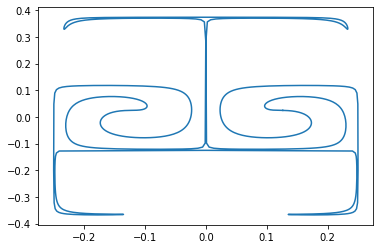

In [4]:
xy1 = np.transpose(np.reshape(np.concatenate([x,y]),[2,len(x)]))
plt.plot(xy1[:,0],xy1[:,1])
np.savetxt('rv.txt', xy1, delimiter=',')

In [332]:
theta=np.arange(0,2*np.pi+2*np.pi/1000,2*np.pi/1000)
x,y=np.cos(theta)*0.15,np.sin(theta) *0.15
y=y+0.75
x=x+0.5
dt = 0.001
t = 0.0
for i in range(3000):
    x,y = rk2_sv(x,y,t,dt)
    t = t + dt

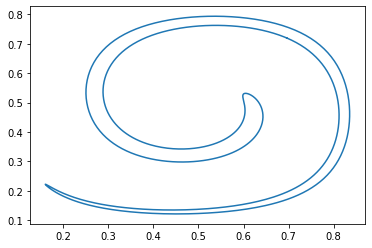

In [333]:
xy2 = np.transpose(np.reshape(np.concatenate([x,y]),[2,len(x)]))
plt.plot(xy2[:,0],xy2[:,1])
np.savetxt('sv.txt',xy2,delimiter=',')

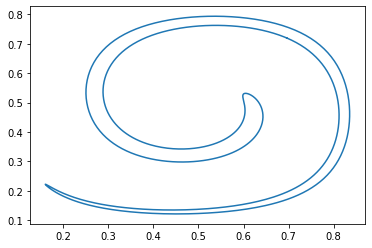